### Arbeidskrav 1 - Gustav Gabrielsen 

### Oppgave 1: Modellen inneholder en rekke parametere. Definer disse paramterene under:

- Lambda: $\lambda$

Lambda (𝜆): Lambda representerer andelen av den arbeidsstyrken i produksjonssektoren som er lokalisert i en gitt region på et bestemt tidspunkt. Lambda er "mobil arbeidskraft" som i praksis betyr arbeiderene som jobber innen produksjonen av fabrikanter. $\lambda_1 = \lambda$ , og  $\lambda_2 = 1 - \lambda$. 

- Rho: $\rho$

Rho (𝜌): Brukes for å indikere graden av substitusjon for fabrikanter i det monopolistiske markedet. Det er definert som $\dfrac{(\sigma - 1)}{\sigma}$, hvor $\sigma$ er elastisiteten av substitusjon. Siden $\rho < 1$ er ikke alle variantene av fabrikanter perfekte substituter, men siden $\rho > 1$ kan de likevel substituteres.   

- Epsilon: $\epsilon$ 

Epsilon (𝜖): Representerer pris elastitsiteten til etterspørselen for en fabrikant. Jo større $\epsilon$ jo større vil fallet i etterspørselen av en fabrikant være dersom prisen øker. 

- Phi: $\phi$

Phi (𝜙): Eksogent gitt andel av den globale landbruksarbeidsstyrken som er tilordent hver region. Denne arbeidsstyrken er ikke mobil, det vil si at den ikke kan flytte på seg, uten at vi endrer modellen endogent.   

- Gamma: $\gamma$

Gamma (𝛾): Andel av arbeidsstyrken L som jobber med produksjon av fabrikanter = $\gamma L$. Andel som jobber innenfor matproduksjon = $(1- \gamma)L$. 

- T: $T$

T: T representerer transportkostnader mellom regioner. I denne modellen representeres transportkostander som en fraksjon av varenes verdi, dette betyr at transport ikke innebærer noen direkte pengeoverføringer, istedenfor blir kostnadene sett på som en reduksjon i mengden varer som ankommer. Dette gjøres for å unngå å måtte modellere en seperat transport industri. 

- Betta: $\beta$

Beta (𝛽): Marginal arbeidskraft nødvendig for å produsere et gode. 

- Delta: $\delta$

Delta (𝛿): Andel av inntekt som brukes på godene i økonomien. Andel brukt på fabrikanter $\delta$ og andel brukt på mat $1- \delta$. 

In [7]:

import numpy as np
import matplotlib.pyplot as plt

# Funksjon for å kalkulere w1/w2 raten
def calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    lmbda1 = lambda_val
    lmbda2 = 1 - lmbda1

    def calc_Y(lmbda, W):
        return lmbda * gamma * L * W + phi1 * (1 - gamma) * L

    def calc_I(lmbdar, Wr, lmbdan, Wn):
        const = (beta / rho) * ((gamma * L) / (alpha * epsilon))**(1 / (1 - epsilon))
        return const * (lmbdar * Wr**(1 - epsilon) + lmbdan * T**(1 - epsilon) * Wn**(1 - epsilon))**(1 / (1 - epsilon))

    def calc_W(Yr, Ir, Yn, In):
        const = (rho * beta**(-rho)) * (delta / ((epsilon - 1) * alpha))**(1 / epsilon)
        return const * (Yr * Ir**(epsilon - 1) + Yn * T**(1 - epsilon) * In**(epsilon - 1))**(1 / epsilon)

    W1 = 1
    W2 = 1
    iterations = 0

    while True:
        Y1 = calc_Y(lmbda1, W1)
        Y2 = calc_Y(lmbda2, W2)
        I1 = calc_I(lmbda1, W1, lmbda2, W2)
        I2 = calc_I(lmbda2, W2, lmbda1, W1)
        new_W1 = calc_W(Y1, I1, Y2, I2)
        new_W2 = calc_W(Y2, I2, Y1, I1)
        w1 = new_W1 * I1**(-delta)
        w2 = new_W2 * I2**(-delta)
        
        criterion1 = abs((new_W1 - W1) / W1)
        criterion2 = abs((new_W2 - W2) / W2)

        if criterion1 < LIMIT and criterion2 < LIMIT:
            break
        
        W1 = new_W1
        W2 = new_W2
        iterations += 1

    return w1 / w2

# Funksjon for å simulere modellen
def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulering for benchmark verdier
lambda_values = np.arange(0, 1.1, 0.1)

# Definer konstanter (disse må du justere basert på hva som er spesifikt for ditt scenario)
gamma = 0.4
L = 1
phi1 = 0.5
beta = 0.8
rho = 0.8
alpha = 0.1
epsilon = 5
delta = 0.4
T = 1.7
LIMIT = 0.0001

benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Skriv ut resultatene
print(benchmark_ratios)

[0.97827655 0.99317911 1.00278747 1.00686527 1.00535653 1.
 0.99467201 0.99318154 0.99722028 1.00686773 1.02220584]


### Oppgave 2: Ved hjelp av koden på bunnen av oppgaven, simuler modellen ved bruk av benchmark-verdiene: 

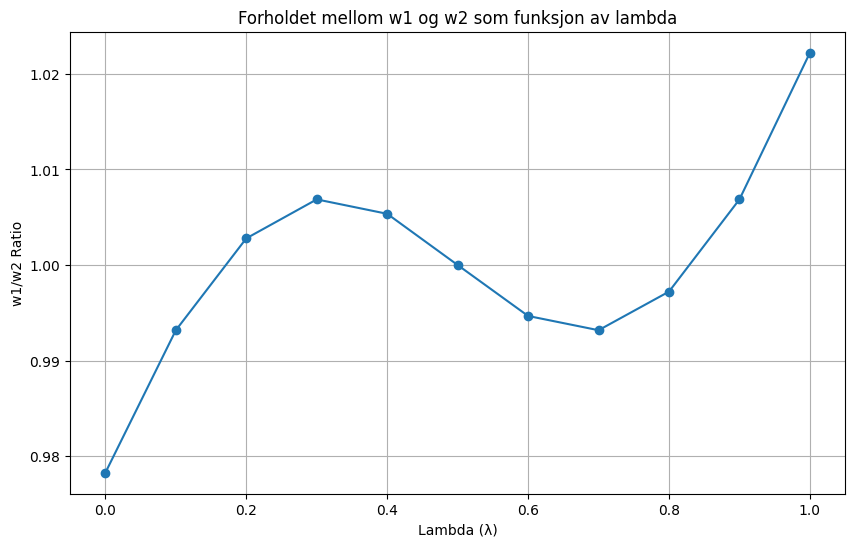

In [8]:
# Simulerer for et sett av lambda-verdier fra 0 til 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o')
plt.title('Forholdet mellom w1 og w2 som funksjon av lambda')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show()

Resultatene viser w1/w2-raten for ulike verdier av lambda (λ), hvor lambda representerer andelen av den mobile produksjonsstyrken som er lokalisert i en gitt region til et gitt tidspunkt. 

- Når arbeidsstyrken er jevnt fordelt mellom de to regionene ($\lambda = 0.5$), er lønnsforholdet likt 1, noe som indikerer at lønningene er like i begge regioner

- For $\lambda$-verdier nær 0 eller 1, hvor arbeidsstyrken er sterkt skjevfordelt mot én av regionene, divergerer $w_1/w_2$ fra 1. Dette reflekterer høyere lønninger i regionen med større andel av arbeidsstyrken, noe som kan skyldes økt produksjonsoutput eller mangel på arbeidskraft som driver lønningene oppover.

### Oppgave 3: I deloppgavene må du variere parameterne. Hver underoppgave løses i et vakuum, så for eksempel etter oppgave a) er fullført så settes T tilbake til 1.7 før neste oppgave løses. Vis gjerne grafisk. 

a)  T endres fra 1.7 til 1.2, hvordan endrer w1/w2 raten seg? For hvilke verdier av 𝜆 vil 
bedriftene agglomerere i region 1? 

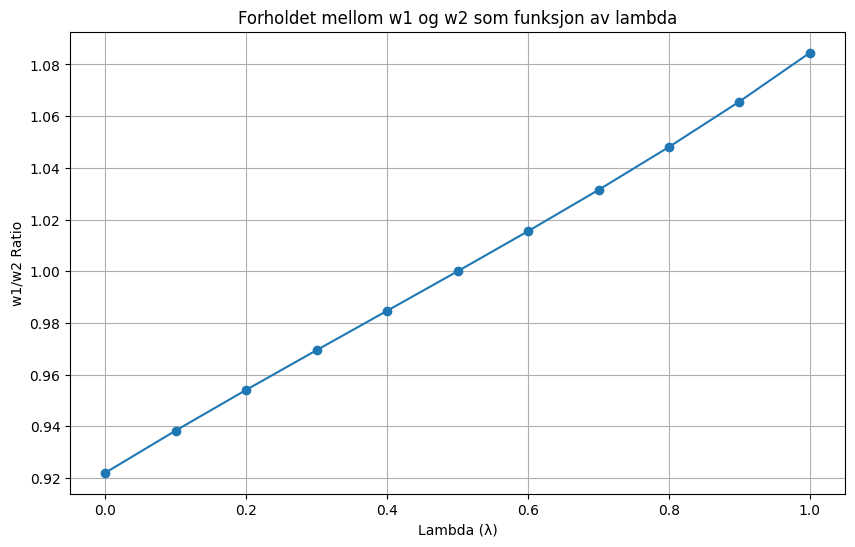

In [9]:
T = 1.2

def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulerer for et sett av lambda-verdier fra 0 til 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o')
plt.title('Forholdet mellom w1 og w2 som funksjon av lambda')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show()

Når handelskostnaden 𝑇 reduseres fra 1.7 til 1.2, observerer vi endringer i w1/w2-raten:

- Redusert transportkostnad (T = 1.2): Når transportkostnaden er lavere, ser vi at forholdet mellom lønningene 𝑤1/𝑤2 har en mindre effekt over $\lambda$ -verdiene sammenlignet med når T er høyere (1.7). Dette indikerer at lavere transportkostnader jevner ut forskjellene mellom regionene ved å redusere den økonomiske barrieren for å flytte varer mellom regionene.

- Stabilisering av lønnsforholdet: Med lavere T, ser vi en tendens til at lønnsforholdet stabiliserer seg nærmere 1 over flere verdier av $\lambda$.
Dette antyder at integrasjonen er sterkere og forskjellene i lønnsnivåene mellom regionene er mindre markante.

b)  Andel bønder i region 2 øker fra 0.5 til 0.7? Hva skjer med w1/w2 raten?

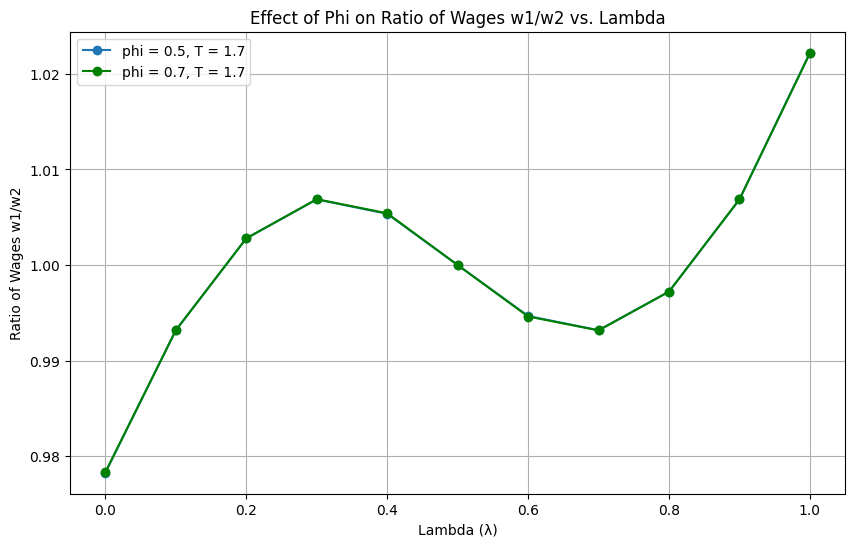

In [10]:
phi1_original = 0.5

phi1_updated = 0.7

T_reset = 1.7

# Redefining the functions from the previous discussion
def calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    lmbda1 = lambda_val
    lmbda2 = 1 - lmbda1

    def calc_Y(lmbda, W):
        return lmbda * gamma * L * W + phi1 * (1 - gamma) * L

    def calc_I(lmbdar, Wr, lmbdan, Wn):
        const = (beta / rho) * ((gamma * L) / (alpha * epsilon))**(1 / (1 - epsilon))
        return const * (lmbdar * Wr**(1 - epsilon) + lmbdan * T**(1 - epsilon) * Wn**(1 - epsilon))**(1 / (1 - epsilon))

    def calc_W(Yr, Ir, Yn, In):
        const = (rho * beta**(-rho)) * (delta / ((epsilon - 1) * alpha))**(1 / epsilon)
        return const * (Yr * Ir**(epsilon - 1) + Yn * T**(1 - epsilon) * In**(epsilon - 1))**(1 / epsilon)

    W1 = 1
    W2 = 1
    iterations = 0

    while True:
        Y1 = calc_Y(lmbda1, W1)
        Y2 = calc_Y(lmbda2, W2)
        I1 = calc_I(lmbda1, W1, lmbda2, W2)
        I2 = calc_I(lmbda2, W2, lmbda1, W1)
        new_W1 = calc_W(Y1, I1, Y2, I2)
        new_W2 = calc_W(Y2, I2, Y1, I1)
        w1 = new_W1 * I1**(-delta)
        w2 = new_W2 * I2**(-delta)

        criterion1 = abs((new_W1 - W1) / W1)
        criterion2 = abs((new_W2 - W2) / W2)

        if criterion1 < LIMIT and criterion2 < LIMIT:
            break
        
        W1 = new_W1
        W2 = new_W2
        iterations += 1

    return w1 / w2

def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulate for a set of lambda values from 0 to 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios_original = simulate_model(lambda_values, gamma, L, phi1_original, beta, rho, alpha, epsilon, delta, T_reset, LIMIT)
benchmark_ratios_updated = simulate_model(lambda_values, gamma, L, phi1_updated, beta, rho, alpha, epsilon, delta, T_reset, LIMIT)

# Plotting the results with the original and updated phi
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios_original, marker='o', linestyle='-', label='phi = 0.5, T = 1.7')
plt.plot(lambda_values, benchmark_ratios_updated, marker='o', linestyle='-', color='green', label='phi = 0.7, T = 1.7')
plt.title("Effect of Phi on Ratio of Wages w1/w2 vs. Lambda")
plt.xlabel("Lambda (λ)")
plt.ylabel("Ratio of Wages w1/w2")
plt.grid(True)
plt.legend()
plt.show()


Ved å øke andel for bønder i region 2 fra 0.5 til 0.7 ser vi endringer i 𝑤1/𝑤2 som følger:

- $\phi$: representerer en fast andel av den globale landbruksarbeidsstyrken som er tildelt hver region. Denne arbeidskraften er ikke-mobil og fast i modellen som simuleres her. Dette kan dempe den observerbare effekten på lønnsforholdet. 

c) Dersom benchmark verdiene holdes, for hvilke lambda vil den langsiktige likevekten være fullstendig agglomerering i en region? 

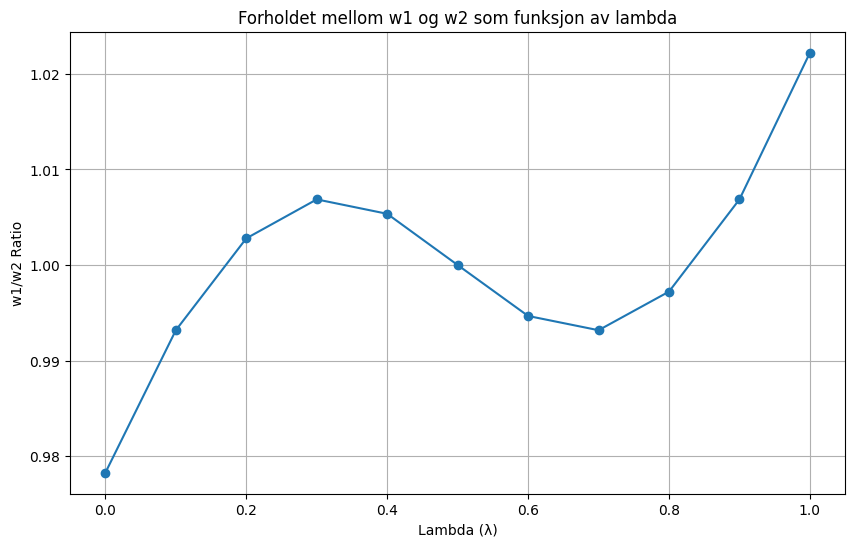

In [11]:
gamma = 0.4
L = 1
phi1 = 0.5
beta = 0.8
rho = 0.8
alpha = 0.1
epsilon = 5
delta = 0.4
T = 1.7
LIMIT = 0.0001

benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Simulerer for et sett av lambda-verdier fra 0 til 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o')
plt.title('Forholdet mellom w1 og w2 som funksjon av lambda')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show()

Når 𝜆 = 1, indikerer dette fullstendig agglomerering i region 1. Når 𝜆 = 0, viser det fullstendig agglomerering i region 2.

d)  Dersom 𝜖 = 2, for hvilke verdier av lambda vil den langsiktige likevekten være fullstendig agglomerering i en region?

<>:83: SyntaxWarning: invalid escape sequence '\e'
<>:83: SyntaxWarning: invalid escape sequence '\e'
C:\Users\gusta\AppData\Local\Temp\ipykernel_15408\2339692014.py:83: SyntaxWarning: invalid escape sequence '\e'
  plt.title('Forholdet mellom w1 og w2 som funksjon av lambda ($\epsilon = 2 $)')


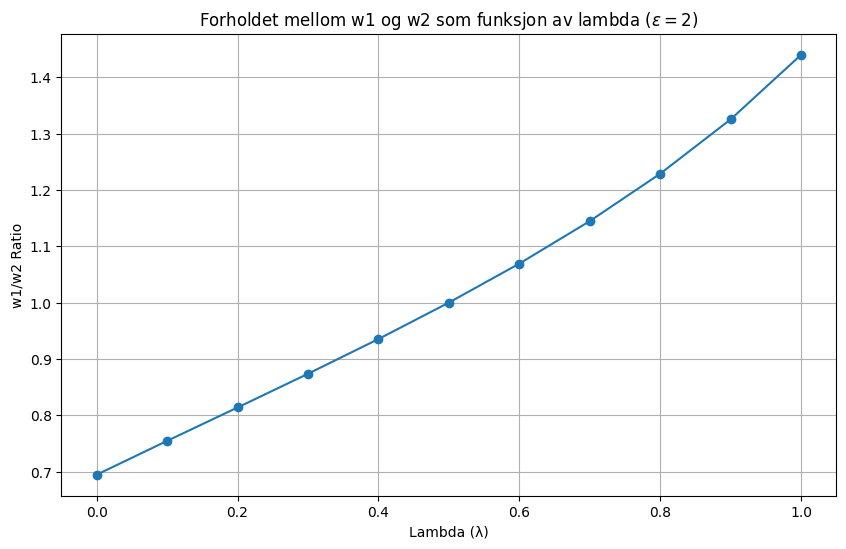

In [12]:

import numpy as np
import matplotlib.pyplot as plt

# Funksjon for å kalkulere w1/w2 raten
def calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    lmbda1 = lambda_val
    lmbda2 = 1 - lmbda1

    def calc_Y(lmbda, W):
        return lmbda * gamma * L * W + phi1 * (1 - gamma) * L

    def calc_I(lmbdar, Wr, lmbdan, Wn):
        const = (beta / rho) * ((gamma * L) / (alpha * epsilon))**(1 / (1 - epsilon))
        return const * (lmbdar * Wr**(1 - epsilon) + lmbdan * T**(1 - epsilon) * Wn**(1 - epsilon))**(1 / (1 - epsilon))

    def calc_W(Yr, Ir, Yn, In):
        const = (rho * beta**(-rho)) * (delta / ((epsilon - 1) * alpha))**(1 / epsilon)
        return const * (Yr * Ir**(epsilon - 1) + Yn * T**(1 - epsilon) * In**(epsilon - 1))**(1 / epsilon)

    W1 = 1
    W2 = 1
    iterations = 0

    while True:
        Y1 = calc_Y(lmbda1, W1)
        Y2 = calc_Y(lmbda2, W2)
        I1 = calc_I(lmbda1, W1, lmbda2, W2)
        I2 = calc_I(lmbda2, W2, lmbda1, W1)
        new_W1 = calc_W(Y1, I1, Y2, I2)
        new_W2 = calc_W(Y2, I2, Y1, I1)
        w1 = new_W1 * I1**(-delta)
        w2 = new_W2 * I2**(-delta)
        
        criterion1 = abs((new_W1 - W1) / W1)
        criterion2 = abs((new_W2 - W2) / W2)

        if criterion1 < LIMIT and criterion2 < LIMIT:
            break
        
        W1 = new_W1
        W2 = new_W2
        iterations += 1

    return w1 / w2

# Funksjon for å simulere modellen
def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulering for benchmark verdier
lambda_values = np.arange(0, 1.1, 0.1)

# Definer konstanter (disse må du justere basert på hva som er spesifikt for ditt scenario)
gamma = 0.4
L = 1
phi1 = 0.5
beta = 0.8
rho = 0.8
alpha = 0.1
epsilon = 2
delta = 0.4
T = 1.7
LIMIT = 0.0001

benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

def simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT):
    w_ratios = np.zeros(len(lambda_values))
    for i, lambda_val in enumerate(lambda_values):
        w_ratios[i] = calculate_w_ratio(lambda_val, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)
    return w_ratios

# Simulerer for et sett av lambda-verdier fra 0 til 1
lambda_values = np.linspace(0, 1, 11)
benchmark_ratios = simulate_model(lambda_values, gamma, L, phi1, beta, rho, alpha, epsilon, delta, T, LIMIT)

# Plotter resultatene
plt.figure(figsize=(10, 6))
plt.plot(lambda_values, benchmark_ratios, marker='o')
plt.title('Forholdet mellom w1 og w2 som funksjon av lambda ($\epsilon = 2 $)')
plt.xlabel('Lambda (λ)')
plt.ylabel('w1/w2 Ratio')
plt.grid(True)
plt.show();

Når $\epsilon$ er redusert til 2, vil vise en situasjon der etterspørselen etter fabrikanter er mindre elastisk med hensyn til prisendringer. Dette kan potensielt forsterke effekten av agglomerering, da regioner som oppnår en liten fordel kan tiltrekke seg mer arbeidskraft og økonomisk aktivitet.

I en slik modell vil fullstendig agglomerering være $\lambda$ nærmer seg 0 eller 1, fordi dette indikerer at nesten all den mobile arbeidsstyrken er konsentrert i henholdsvis region 1 eller region 2. Dette skaper en situasjon der den økonomiske aktiviteten domineres av en region, mens den andre har svært lite eller ingen produksjon.

### Litteraturhenvisning 

 Brakman, S., Garretsen, H., van Marrewijk, C. (2020) "An Introduction to Geographical and Urban Economics – A Spiky World". Cambridge University Press.

 